In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
flat_chess=cv2.imread('flat_chessboard.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

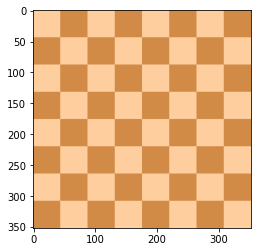

In [6]:
plt.imshow(flat_chess)

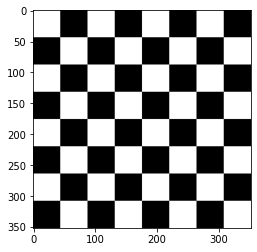

In [8]:
grey_img=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img,cmap='gray')

In [23]:
real_img=cv2.imread('real_chessboard.jpg')
real_img=cv2.cvtColor(real_img,cv2.COLOR_BGR2RGB)

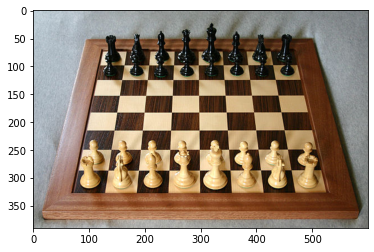

In [24]:
plt.imshow(real_img)

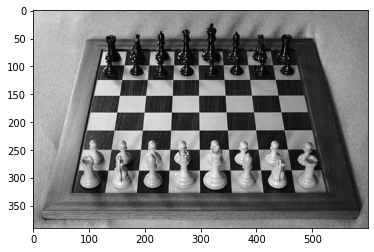

In [25]:
grey_real=cv2.cvtColor(real_img,cv2.COLOR_BGR2GRAY)
plt.imshow(grey_real,cmap='gray')

In [14]:
 #for harris croner detection the pixel values should be in float therefore converting them into float
grey_img   

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [16]:
#float conversion
grey=np.float32(grey_img)

In [18]:
#float conversion done
grey

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [19]:
dst=cv2.cornerHarris(src=grey,blockSize=2,ksize=3,k=0.04)
#blocksize deals with the size of window for hovering
#ksize is the size of the sobel operator for gradient calculation(in both x and y axis)-should be an odd num
#k is the harris free detector operator ranges between 0.04-0.06

In [20]:
dst=cv2.dilate(dst,None)
#dilation is a morphological operator used to enhance the boundaries
#none indicates the default kernel size i.e 3*3

In [21]:
flat_chess[dst>0.01*dst.max()]=(255,0,0)

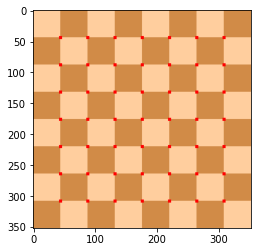

In [22]:
plt.imshow(flat_chess)

In [26]:
#now on the real chess image
grey_rl=np.float32(grey_real)

In [27]:
grey_rl

array([[210., 204., 202., ..., 119., 119., 124.],
       [203., 200., 199., ..., 118., 116., 117.],
       [213., 214., 212., ..., 130., 128., 128.],
       ...,
       [120., 131., 144., ..., 115., 119., 118.],
       [124., 143., 153., ..., 111., 112., 107.],
       [135., 155., 156., ..., 113., 113., 107.]], dtype=float32)

In [28]:
dst1=cv2.cornerHarris(src=grey_rl,blockSize=2,ksize=3,k=0.04)

In [30]:
dst1=cv2.dilate(dst1,None)

In [31]:
real_img[dst1>0.01*dst1.max()]=(255,0,0)

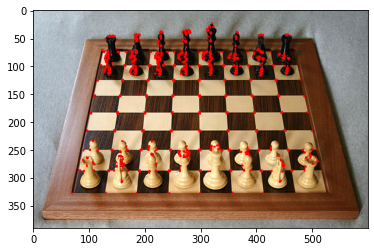

In [32]:
plt.imshow(real_img)

In [35]:
#reloading all the images to perform shi-tomashi corner detection
flat_chess=cv2.imread('flat_chessboard.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_img=cv2.imread('real_chessboard.jpg')
real_img=cv2.cvtColor(real_img,cv2.COLOR_BGR2RGB)

grey_img=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
grey_real=cv2.cvtColor(real_img,cv2.COLOR_BGR2GRAY)

In [37]:
corners=cv2.goodFeaturesToTrack(grey_img,5,0.01,10)
#5- the number of corners we want to detect
#0.01-quality level threshold parameter ranges btw 0-1.corners with a value more than the mentioned will only be detected
#10-min euclidean distance.if the distance btw two corners is less than this one of the corners will be rejected.

In [38]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]]], dtype=float32)

In [39]:
#values has to be int 
corners=np.int0(corners)

In [40]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

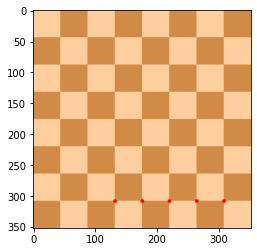

In [41]:
plt.imshow(flat_chess)

In [46]:
corners=cv2.goodFeaturesToTrack(grey_real,90,0.01,10)

In [47]:
corners=np.int0(corners)

In [48]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(real_img,(x,y),3,(255,0,0),-1)

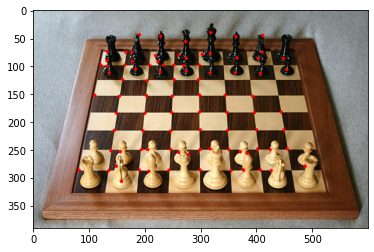

In [49]:
plt.imshow(real_img)